# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

cities_needed = 25
counter = 25
while len(cities) < cities_needed:
    lats = np.random.uniform(lat_range[0], lat_range[1], size= counter)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=counter)
    lat_lngs = zip(lats, lngs)

    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        if city not in cities:
            cities.append(city)  
    counter = counter - len(cities)
    
print(len(cities))    

25


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

counter = 0
batch_counter = 1
record_counter = 1

max_cities = 24
max_temp = []
lat = []
lon = []
humidity = []
cloudy = []
wind_speed = []
city_name = []
country = []
date = []

for city in cities:
    query_url = f"{base_url}{city}&appid={weather_api_key}&units=imperial"
    if len(city_name) < max_cities:
        if counter < 5:
            try:      
                response = requests.get(query_url)
                response_json = response.json()     

                if city not in city_name:                    
                    city_name.append(response_json["name"])
                    country.append(response_json["sys"]["country"])
                    lat.append(response_json["coord"]["lat"])
                    lon.append(response_json["coord"]["lon"])  
                    date.append(response_json["dt"])
                    try:
                        max_temp.append(response_json["main"]["temp_max"])
                    except:
                        print("This {city} has no information on temperature")
                        pass
                    try:
                        humidity.append(response_json["main"]["humidity"])
                    except:
                        print("This {city} has no information on humidity")
                        pass
                    try:
                        cloudy.append(response_json['clouds']["all"])
                    except:
                        print("This {city} has no information on cloudiness")
                        pass                        
                    try:
                        wind_speed.append(response_json["wind"]["speed"])
                    except:
                        print("This {city} has no information on wind speed")
                        pass 

                print(f"Processing Record {record_counter} for Set{batch_counter}:|{city}")
                counter += 1
                record_counter += 1
            except:
                print(f"City not found....skipping")
                pass
        else:
            counter = 0
            batch_counter += 1
            time.sleep(20)

print(response_json)
print(lat)
print(lon)
print(max_temp)
print(humidity)
print(cloudy)
print(wind_speed)
print(city_name)
print(counter)
print(batch_counter)


Processing Record 1 for Set1:|vaini
Processing Record 2 for Set1:|qaanaaq
Processing Record 3 for Set1:|kimberley
Processing Record 4 for Set1:|kutahya
Processing Record 5 for Set1:|bluff
Processing Record 6 for Set2:|punta arenas
Processing Record 7 for Set2:|port alfred
Processing Record 8 for Set2:|jamestown
Processing Record 9 for Set2:|flinders
Processing Record 10 for Set2:|rikitea
Processing Record 11 for Set3:|port lincoln
Processing Record 12 for Set3:|cidreira
Processing Record 13 for Set3:|barrow
Processing Record 14 for Set3:|puerto ayora
Processing Record 15 for Set3:|vanimo
Processing Record 16 for Set4:|tasiilaq
City not found....skipping
Processing Record 17 for Set4:|tiksi
Processing Record 18 for Set4:|hermanus
Processing Record 19 for Set4:|viedma
City not found....skipping
Processing Record 20 for Set4:|campos novos
{'coord': {'lon': -51.225, 'lat': -27.4017}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
city_group = {"City":city_name,
             "Lat":lat,
             "Lng":lon,
             "Max Temp": max_temp,
             "Humidity": humidity,
             "Cloudiness": cloudy,
             "Wind Speed": wind_speed,
             "Country": country,
             "Date": date}

city_df = pd.DataFrame(city_group)
city_df.to_csv(output_data_file)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,82.40,83,20,3.44,TO,1619214654
1,Qaanaaq,77.4840,-69.3632,22.28,83,100,4.63,GL,1619214490
2,Kimberley,-28.7323,24.7623,53.60,54,0,8.05,ZA,1619214654
3,Kütahya,39.4242,29.9833,53.60,62,0,10.36,TR,1619214654
4,Bluff,-46.6000,168.3333,46.00,94,82,16.17,NZ,1619214655
5,Punta Arenas,-53.1500,-70.9167,46.40,93,75,3.44,CL,1619214675
6,Port Alfred,-33.5906,26.8910,66.43,72,0,21.41,ZA,1619214232
7,Jamestown,42.0970,-79.2353,55.40,30,1,17.27,US,1619214453
8,Flinders,-34.5833,150.8552,54.00,75,89,1.01,AU,1619214328
9,Rikitea,-23.1203,-134.9692,79.11,68,100,17.56,PF,1619214675


In [16]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,2.000000e+01
mean,-2.217035,-7.639525,54.722500,71.800000,49.200000,8.72450,1.619215e+09
std,45.081882,106.591009,20.895807,17.227884,43.235706,6.66111,1.616693e+02
min,-53.150000,-175.200000,7.450000,30.000000,0.000000,1.01000,1.619214e+09
25%,-34.459850,-72.996350,46.300000,60.250000,1.000000,3.44000,1.619215e+09
50%,-25.261000,-43.921200,56.200000,74.000000,59.500000,5.99500,1.619215e+09
75%,40.092400,54.704825,67.470000,83.750000,91.250000,16.44500,1.619215e+09
max,77.484000,168.333300,84.200000,94.000000,100.000000,21.41000,1.619215e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
high_humidity = city_df.loc[city_df["Humidity"] > 100,:]    
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [18]:
#  Get the indices of cities that have humidity over 100%.
high_humidity.index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(city_df[city_df['Humidity'] > 100].index, inplace = False)
clean_city_df = clean_city_df.reset_index(drop = True)
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,82.40,83,20,3.44,TO,1619214654
1,Qaanaaq,77.4840,-69.3632,22.28,83,100,4.63,GL,1619214490
2,Kimberley,-28.7323,24.7623,53.60,54,0,8.05,ZA,1619214654
3,Kütahya,39.4242,29.9833,53.60,62,0,10.36,TR,1619214654
4,Bluff,-46.6000,168.3333,46.00,94,82,16.17,NZ,1619214655
5,Punta Arenas,-53.1500,-70.9167,46.40,93,75,3.44,CL,1619214675
6,Port Alfred,-33.5906,26.8910,66.43,72,0,21.41,ZA,1619214232
7,Jamestown,42.0970,-79.2353,55.40,30,1,17.27,US,1619214453
8,Flinders,-34.5833,150.8552,54.00,75,89,1.01,AU,1619214328
9,Rikitea,-23.1203,-134.9692,79.11,68,100,17.56,PF,1619214675


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

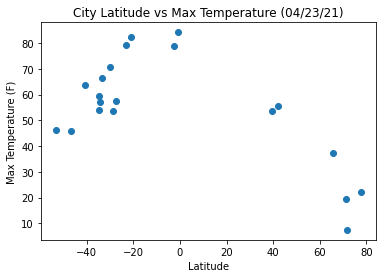

In [28]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o", cmap="viridis")
plt.title("City Latitude vs Max Temperature (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

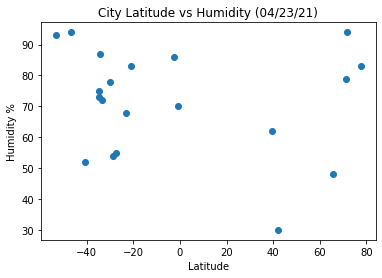

In [29]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o", cmap="viridis")
plt.title("City Latitude vs Humidity (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()

## Latitude vs. Cloudiness Plot

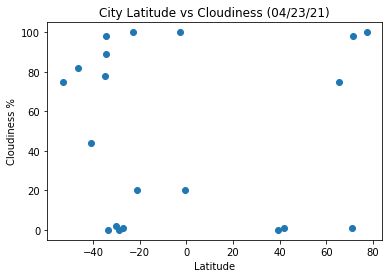

In [30]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o", cmap="viridis")
plt.title("City Latitude vs Cloudiness (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()

## Latitude vs. Wind Speed Plot

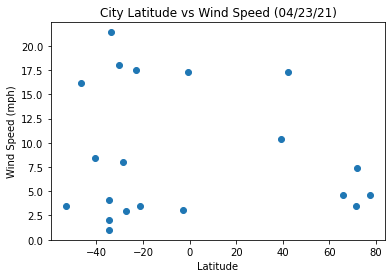

In [31]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o", cmap="viridis")
plt.title("City Latitude vs Wind Speed (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

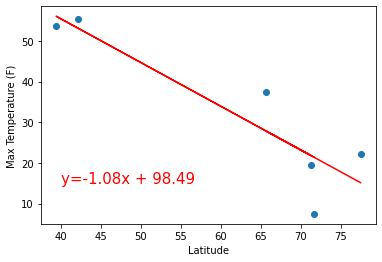

In [34]:
north_cities = clean_city_df.loc[clean_city_df["Lat"]>= 0,:]
x_axis = north_cities["Lat"]
y_axis = north_cities["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(40,15),fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

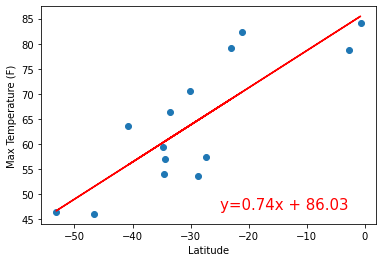

In [37]:
south_cities = clean_city_df.loc[clean_city_df["Lat"]< 0,:]
x_axis = south_cities["Lat"]
y_axis = south_cities["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-25,47),fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

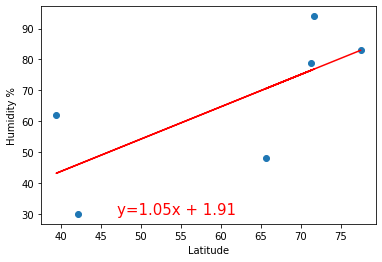

In [40]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(47,30),fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

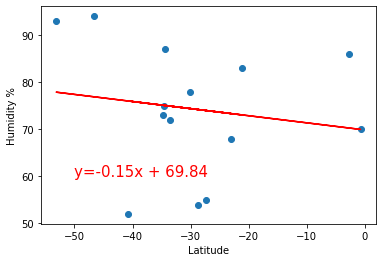

In [42]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-50,60),fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

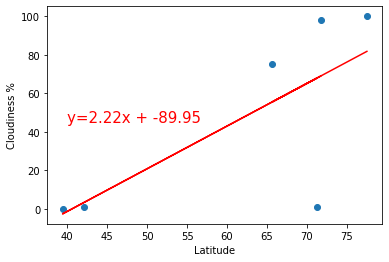

In [44]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(40,45),fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

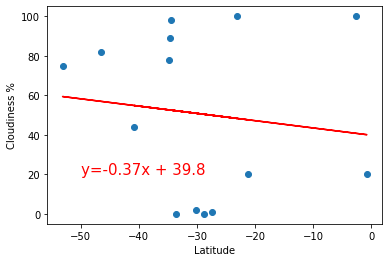

In [46]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-50,20),fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

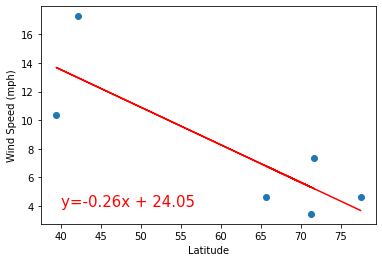

In [49]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(40,4),fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

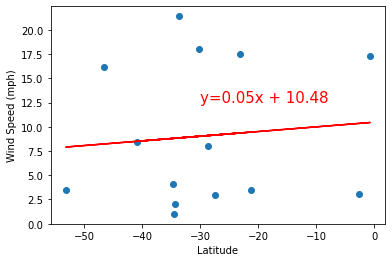

In [51]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-30,12.5),fontsize=15, color="red")

plt.show()